# Logistic Regression Hypertuned

In [179]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

In [180]:
test_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/test.csv')

test_df.shape

(334, 22)

In [181]:
train_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/train.csv')

train_df.shape

(2999, 22)

In [182]:
test_df = test_df.drop(columns=['Unnamed: 0'])
train_df = train_df.drop(columns=['Unnamed: 0'])

In [183]:
X = train_df.drop(['churn'], axis = 1)
y = train_df['churn']

In [184]:
y.value_counts(normalize = True)

False    0.856619
True     0.143381
Name: churn, dtype: float64

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)

In [186]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import set_config
set_config(display='diagram')

In [187]:
# numeric columns + drop phone #
X_tr_num = X_train.drop(['state', 'area code', 'phone number', 'international plan', 'voice mail plan'], axis=1)
X_tr_num

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
93,142,0,140.8,140,23.94,228.6,119,19.43,152.9,88,6.88,10.9,7,2.94,1
419,135,0,201.8,81,34.31,225.0,114,19.13,204.4,82,9.20,10.3,6,2.78,1
2907,134,32,216.8,78,36.86,102.2,111,8.69,174.0,83,7.83,8.6,2,2.32,0
2525,103,36,87.2,92,14.82,169.3,110,14.39,166.7,80,7.50,10.9,5,2.94,6
2592,92,29,201.3,130,34.22,203.7,115,17.31,129.9,113,5.85,6.4,6,1.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,65,29,158.1,104,26.88,322.2,81,27.39,210.0,96,9.45,8.9,6,2.40,1
683,55,25,165.6,123,28.15,136.1,95,11.57,175.7,90,7.91,11.0,2,2.97,3
2688,103,0,246.5,47,41.91,195.5,84,16.62,200.5,96,9.02,11.7,4,3.16,1
2687,80,0,189.1,122,32.15,223.2,92,18.97,269.0,116,12.11,13.9,3,3.75,2


In [188]:
# doing the same for X test
X_te_num = X_test.drop(['state', 'area code', 'phone number', 'international plan', 'voice mail plan'], axis=1)

In [189]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# steps = [('std_scaler', StandardScaler()),('smote', SMOTE()), ('lg', LogisticRegression())]
# logreg_pipe = Pipeline(steps)

In [190]:
logModel = LogisticRegression()

In [191]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [192]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [193]:
best_clf = clf.fit(X_tr_num,y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1184 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 3208 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 6008 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  1.3min finished


In [194]:
best_clf.best_estimator_

LogisticRegression(C=0.004832930238571752, solver='newton-cg')

In [195]:
print (f'Accuracy - : {best_clf.score(X_tr_num,y_train):.3f}')

Accuracy - : 0.869


In [196]:
print (f'Accuracy - : {best_clf.score(X_te_num,y_test):.3f}')

Accuracy - : 0.861


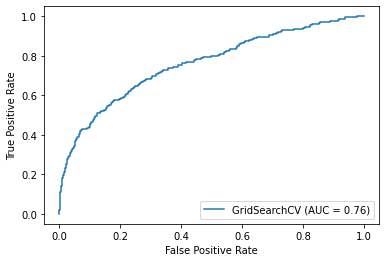

In [197]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
plot_roc_curve(best_clf,X_tr_num,y_train)

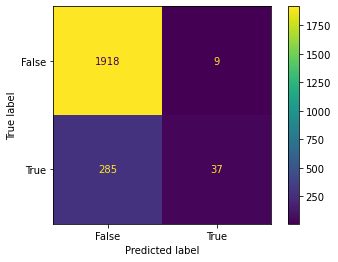

In [198]:
plot_confusion_matrix(best_clf,X_tr_num,y_train)

In [199]:
y_pred = best_clf.predict(X_te_num)

In [200]:
from sklearn.metrics import recall_score
recall_score(y_test ,y_pred, average='macro')

0.5262201453790238

In [201]:
co = best_clf.best_estimator_.coef_

In [202]:
co[0]

array([ 8.83489068e-04, -2.82069797e-02,  1.34189086e-02, -5.90160064e-04,
        2.40564938e-03,  6.47860372e-03,  3.28240223e-03,  3.80297394e-04,
        3.18558330e-03,  3.06907756e-03,  1.00265260e-04,  7.56565224e-02,
       -7.15656646e-02,  2.04172247e-02,  3.06361483e-01])

In [203]:
name = X_tr_num.columns

In [204]:
name

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')

In [205]:
names = pd.DataFrame({'Names' : name,
                                'Weights' : co[0]})
    

In [207]:
top10=names.sort_values('Weights', ascending=False)
top10

,Names,Weights
14,customer service calls,0.306361
11,total intl minutes,0.075657
13,total intl charge,0.020417
2,total day minutes,0.013419
5,total eve minutes,0.006479
6,total eve calls,0.003282
8,total night minutes,0.003186
9,total night calls,0.003069
4,total day charge,0.002406
0,account length,0.000883


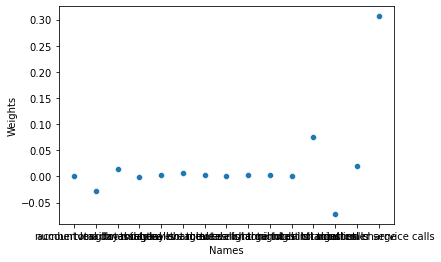

In [211]:
fig = sns.scatterplot(x=names['Names'], y=names['Weights'], palette="deep")

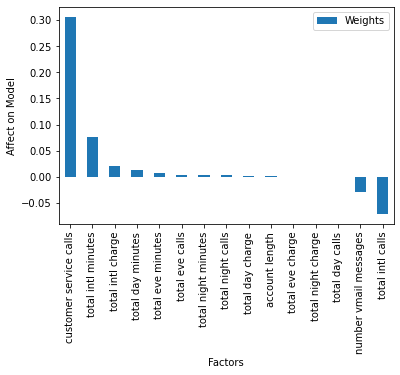

In [217]:
top10.plot(x='Names', y='Weights', kind='bar')
plt.xlabel('Factors')
plt.ylabel('Affect on Model')
plt.show()